In [111]:
import pandas as pd
import seaborn as sns

kospi =  pd.read_csv("./kospi(최종).csv")
kospi

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,990,2014,4615.0,-47.32,44367832.0,2.047575e+11,0.310559,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
1,DB하이텍,990,2015,14300.0,67.63,44367832.0,6.344600e+11,-1.144578,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,990,2016,15900.0,29.65,44367832.0,7.054485e+11,20.782313,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,990,2017,12000.0,27.62,44367832.0,5.324140e+11,1.243094,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,990,2018,10850.0,17.12,44398588.0,4.817247e+11,-3.046683,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,41.51,4479948.0,2.670049e+12,51.001642,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554,371500.0
1335,효성첨단소재,298050,2022,333500.0,19.11,4479948.0,1.494063e+12,4.051144,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1336,효성티앤씨,298020,2020,211000.0,25.10,4327682.0,9.131409e+11,-4.189944,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1337,효성티앤씨,298020,2021,521000.0,76.22,4327682.0,2.254722e+12,43.653846,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [112]:
# kospi = kospi[['회사명', '회계년도', '수익률', 'PER']]
# kospi

In [114]:
# kospi_PER14 = kospi.loc[kospi["회계년도"] == 2014].sort_values(by = ["PER"], ascending=False).reset_index(drop=True)
# kospi_PER14

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,롯데관광개발,32350,2014,13950.0,0.68,24613632.0,3.433602e+11,10.315826,1365.720,3.425,183.590,9.885,0.577968,0.062753,inf,11643.0
1,오리온홀딩스,1800,2014,1015000.0,13.80,5974969.0,6.064594e+12,-2.407718,1020.735,6.640,83.695,7.070,5.943598,0.135764,0.011005,39347.0
2,동원산업,6040,2014,311000.0,9.18,3363200.0,1.045955e+12,0.511551,887.825,1.990,58.245,1.700,4.003344,0.117012,0.028003,63700.0
3,에스케이네트웍스,1740,2014,8940.0,1.26,248187647.0,2.218798e+12,2.069409,199.420,1.000,0.000,0.115,0.371773,0.693926,0.078370,9390.0
4,OCI,10060,2014,78600.0,-0.71,23849371.0,1.874561e+12,1.347962,156.590,1.155,212.335,1.505,0.570647,0.235466,0.131926,181000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,아시아나항공,20560,2014,7130.0,6.53,195101365.0,1.391073e+12,-1.189011,0.000,1.420,3.335,0.195,0.770835,0.396369,0.075643,24054.0
127,에쓰-오일,10950,2014,48400.0,-5.61,112582792.0,5.449007e+12,-3.347732,0.000,1.340,7.405,0.225,-2.806507,0.103698,0.005881,61600.0
128,에이치디한국조선해양,9540,2014,115000.0,-10.91,76000000.0,8.740000e+12,0.071057,0.000,1.000,10.530,0.570,-4.132413,0.289750,inf,193038.0
129,엘지전자,66570,2014,59100.0,3.40,163647814.0,9.671586e+12,-1.850000,0.000,1.480,18.785,0.425,1.352518,1.231762,0.082645,65200.0


In [115]:
# kospi_PER14["수익률"].iloc[(len(kospi_PER14.index) * 0 // 5):(len(kospi_PER14.index) * 1 // 5)].mean()
# kospi_PER13["수익률"].iloc[(len(kospi_PER13.index) * 1 // 5):(len(kospi_PER13.index) * 2 // 5)].mean()
# kospi_PER13["수익률"].iloc[(len(kospi_PER13.index) * 2 // 5):(len(kospi_PER13.index) * 3 // 5)].mean()
# kospi_PER13["수익률"].iloc[(len(kospi_PER13.index) * 3 // 5):(len(kospi_PER13.index) * 4 // 5)].mean()
# kospi_PER13["수익률"].iloc[(len(kospi_PER13.index) * 4 // 5):(len(kospi_PER13.index) * 5 // 5)].mean()

In [116]:
# kospi_PER14["수익률"].iloc[(len(kospi_PER14.index) * 1 // 5):(len(kospi_PER14.index) * 2 // 5)].mean()

In [117]:
# kospi_PER14["수익률"].iloc[(len(kospi_PER14.index) * 2 // 5):(len(kospi_PER14.index) * 3 // 5)].mean()

In [ ]:
# return_mean = [pd.DataFrame() for _ in range(8)]

# for i in range(8):
#     momentum_list[i]['quantile'] = pd.qcut(momentum_list[i]['전년 수익률'], 5, labels=False)
#     quantile_means = momentum_list[i].groupby('quantile')['수익률'].mean()
#     return_mean[i] = quantile_means
#     print(quantile_means)

In [ ]:
import matplotlib.pyplot as plt

#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치_윈저라이징전 = kospi[kospi.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int = df_수치_윈저라이징전.columns

plt.figure(figsize=(20,20))

for i in range(1,60,1):
    plt.subplot(9,7,i)
    a = df_수치_윈저라이징전.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

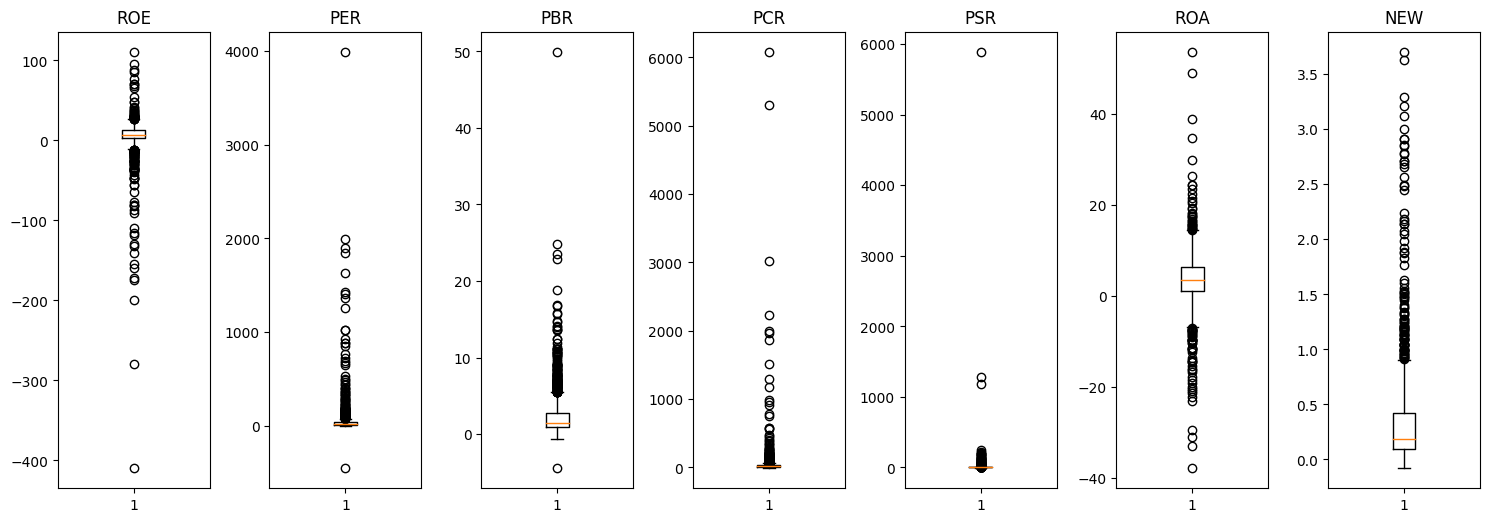

In [128]:
import matplotlib.pyplot as plt

# create a dataframe with only numeric columns
df_수치_윈저라이징전 = kospi[["ROE", "PER", "PBR", "PCR", "PSR", "ROA", "NEW"]]

# Extract numeric dataframe columns
col_int = df_수치_윈저라이징전.columns

plt.figure(figsize=(15, 15))  # Adjust the figure size to accommodate the 3x3 grid

num_cols = len(col_int)
num_rows = 3
num_plots = num_rows * num_cols

for i in range(1, num_plots + 1):
    if i <= num_cols:
        col_index = i - 1
        a = df_수치_윈저라이징전.iloc[:, col_index]
        b = col_int.str[:5][col_index]
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot(a)
        plt.title(b)

# Remove any remaining empty subplots
for i in range(num_plots + 1, num_rows * num_cols + 1):
    plt.delaxes(plt.subplot(num_rows, num_cols, i))

plt.tight_layout()  # Improve the spacing between subplots
plt.show()